In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data Set and Preparing required DataFrame

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_title=pd.read_csv("Movie_Id_Titles")

In [5]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging the movie titles

In [6]:
df=pd.merge(df,movie_title,how='inner',left_on='item_id',right_on='item_id')

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
sns.set_style("whitegrid")

In [9]:
rat=df.groupby('title')['rating'].describe()[['count','mean']]

In [10]:
rat.head()

,count,mean
title,,
'Til There Was You (1997),9.0,2.333333
1-900 (1994),5.0,2.600000
101 Dalmatians (1996),109.0,2.908257
12 Angry Men (1957),125.0,4.344000
187 (1997),41.0,3.024390


## Performing Data Visualization With the Data

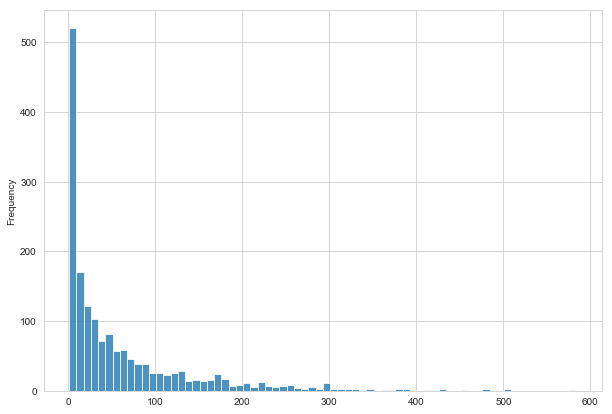

In [11]:
plt.figure(figsize=(10,7))
rat['count'].plot.hist(alpha=0.8,bins=70)

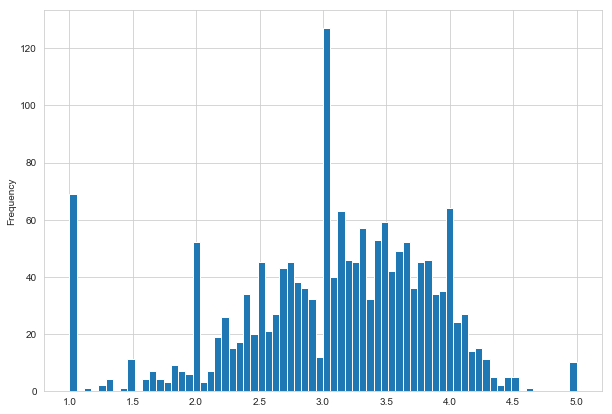

In [12]:
plt.figure(figsize=(10,7))
rat['mean'].plot.hist(bins=70)

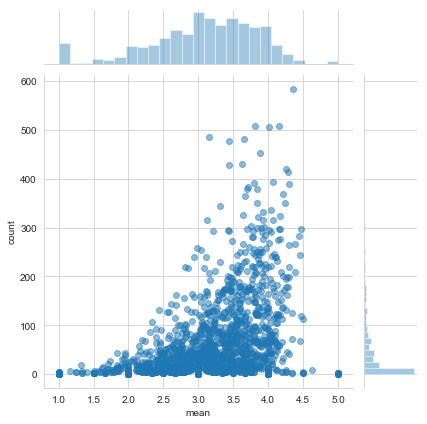

In [15]:
#plt.figure(figsize=(14,10))
sns.jointplot(x='mean',y='count',data=rat,alpha=0.5)

### Creating Pivot table to get the correlation

In [16]:
ndf=pd.pivot_table(df,values='rating',columns='title',index='user_id')

In [17]:
ndf.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating function to get the recommendation of given movie at min no of reviews on it.

In [18]:
def rec_sys(key,mincount):
    ans=pd.DataFrame(ndf.corrwith(ndf[key]).dropna(),columns=['correlations']).join(rat['count'])
    return ans[ans['count']>=mincount].sort_values('correlations',ascending=False)
    

### running for star wars at more than  100 reviews

In [19]:
rec_sys('Star Wars (1977)',100).head(8)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlations,count
title,,
Star Wars (1977),1.000000,584.0
"Empire Strikes Back, The (1980)",0.748353,368.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0
"Sting, The (1973)",0.367538,241.0
Indiana Jones and the Last Crusade (1989),0.350107,331.0
Pinocchio (1940),0.347868,101.0


In [21]:
# for Fargo (1996) at 90 reviews

rec_sys('Fargo (1996)',70).head(8)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlations,count
title,,
Fargo (1996),1.000000,508.0
To Die For (1995),0.551740,87.0
Bullets Over Broadway (1994),0.491990,86.0
Dolores Claiborne (1994),0.451390,79.0
"Big Sleep, The (1946)",0.407521,73.0
Eat Drink Man Woman (1994),0.389068,80.0
Bob Roberts (1992),0.384639,85.0
Sling Blade (1996),0.381159,136.0
